<a href="https://colab.research.google.com/github/eclipseeyo/practiceML/blob/main/%D0%B4%D0%B74%D0%BC%D0%BE%D0%B4%D1%83%D0%BB%D1%8C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Градиентный спуск. Практика

## Импорт библиотек, установка константных значений

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import make_regression, fetch_california_housing
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

In [ ]:
RANDOM_STATE = 123
TRAIN_SIZE = 0.75

In [ ]:
np.random.RandomState(RANDOM_STATE)

RandomState(MT19937) at 0x7B3EDF309F40

In [ ]:
np.random.seed(RANDOM_STATE)

X, y, _ = make_regression(n_samples=100000,              # число объектов
                          n_features=10,                 # число признаков
                          n_informative=8,               # число информативных признаков
                          noise=100,                     # уровень шума в данных
                          coef=True,                     # значение True используется при генерации данных
                          random_state=RANDOM_STATE)

X = pd.DataFrame(data=X, columns=np.arange(0, X.shape[1]))
X[10] = X[6] + X[7] + np.random.random()*0.01

## Практика

Реализуем метод градиентного спуска для обучения линейной регрессии.

### Задание 1 (1 балл)


Напишите функцию, вычисляющую значение весов в линейной регрессии по точной (аналитически найденной) формуле:

$$w = (X^TX)^{-1}X^Ty$$

Комментарий: для поиска решения в векторном виде сначала необходимо добавить единичный столбец к матрице $X$.
Это сделано в коде.

In [ ]:
def ols_solution(X, y):
    X = np.hstack((np.ones((X.shape[0], 1)), X))
    w = (np.linalg.inv(X.T @ X)) @ (X.T @ y)
    return w

### Задание 2 (1 балл)

Заполните функцию для предсказания модели по формуле
$$a(X)=Xw$$

In [ ]:
def prediction(X, w):
    X = np.hstack((np.ones((X.shape[0], 1)), X))
    return X @ w

Продублируем функцию для вычисления значения MSE из урока

In [ ]:
def compute_cost(X, y, theta):
    m = len(y)
    cost = (1./m) * (np.linalg.norm(X @ theta - y) ** 2)
    return cost

### Задание 3

Скопируйте метод градиентного спуска из [урока](https://colab.research.google.com/drive/1Bos0LeQP9AAB-nrS0z8b-8ag5xRSEdty?usp=sharing) в этот ноутбук.


In [ ]:
def gradient_descent(X, y, learning_rate, iterations):
    X = np.hstack((np.ones((X.shape[0], 1)), X))
    w = np.random.rand(X.shape[1])

    m = X.shape[0]

    cost_track = np.zeros((iterations, 1))

    for i in range(iterations):
        w = w - 2./m * learning_rate * (X.T @ ((X @ w) - y))
        cost_track[i] = compute_cost(X, y, w)

    return cost_track, w

### Бонус для отважных

Если чувствуете в себе силы, попробуйте написать SGD сами.

Модифицируйте метод градиентного спуска из урока так, чтобы это теперь был метод стохастического градиентного спуска:

* на каждой итерации выбирайте один случайный индекс `j` при помощи функции `random.randint`

* градиент на каждой итерации градиентного спуска считайте не как сумму градиентов по всем объектам, а только по одному объекту с индексом `j`

* на каждой итерации вычисляйте значение функции потерь и сохраняйте в список `cost_track`, который верните вместе с результатом работы функции

In [ ]:
import random

def stochastic_gradient_descent(X, y, learning_rate, iterations):

    X = np.hstack((np.ones((X.shape[0], 1)), X))
    w = np.random.rand(X.shape[1])

    j = 0

    cost_track = np.zeros((iterations,1))

    for i in range(iterations):

        # выберите случайный индекс в диапазон от 0 до len(X)-1 включительно при помощи функции random.randint
        j = np.random.randint(low=0, high=len(X)-1)

        # обновите веса, используя сдвиг по градиенту только по объекту X[j] (делить на m в данном случае не нужно)
        w = w - 2. * learning_rate * (X[j].reshape(1,-1).T @ ((X[j].reshape(1,-1) @ w) - y[j]))
        cost_track[i] = compute_cost(X, y, w)

    return cost_track, w

- Обучите линейную регрессию тремя методами (по точной формуле, с помощью GD и с помощью SGD) на данных для задачи регрессии ($X, y$). Для GD и самостоятельно написанного SGD используйте `learning_rate = 0.01, iterations = 10000`.

*P.S. Если же вы используете не самописный SGD, а SGDRegressor из библиотеки sklearn.linear_model, то его объявляйте с гиперпараметрами по умолчанию, то есть в скобках при объявлении модели ничего не указывайте.*

- С помощью каждого метода сделайте предсказание (на всех данных), вычислите качество предсказания r2 (`from sklearn.metrics import r2_score`). Для получения предсказания использовуйте функцию `predict`.


In [ ]:
# **План**

# 1 - находим веса одним из методов

# 2 - применяем функцию prediction для получения предсказаний с найденными весами (либо predict в случае использования SGDRegressor из библиотеки sklearn)

# 3 - вычисляем значение метрики r2

In [ ]:
from sklearn.metrics import r2_score

In [ ]:
# your code for OLS here
w_an = ols_solution(X, y)
pred_an = prediction(X, w_an)
r2_an = r2_score(y, pred_an)
r2_an

0.7545141808334817

## Quiz

Чему равно значение метрики $R^2$ для аналитического подхода?

Ответ округлите до сотых.

In [ ]:
# your code for GD here
cost_gd, w_gd = gradient_descent(X, y, 0.01, 10000)
pred_gd = prediction(X, w_gd)
r2_gd = r2_score(y, pred_gd)
r2_gd

0.7554626185750483

## Quiz

Нарисуйте траекторию уменьшения ошибки при обучении градиентного спуска (это параметр `cost_track`, возвращаемый функцией).

Чему приблизительно равен loss модели на последних итерациях?

Выберите наиболее близкий к полученному вами ответ.

9982.203531265024

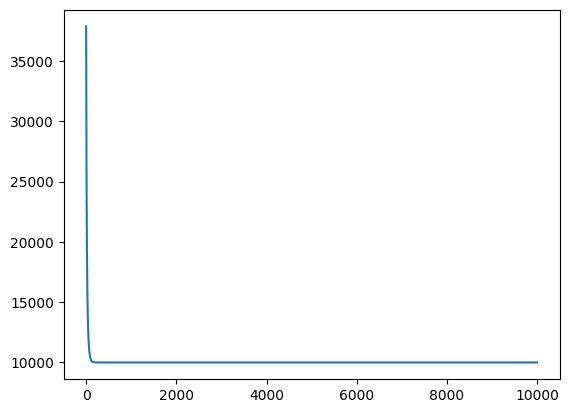

In [ ]:
plt.plot(cost_gd)
cost_gd[9950:].mean()

In [ ]:
X[5].to_numpy().reshape(1,-1)

array([[ 0.52458927, -0.17188024,  0.25233709, ...,  1.73203582,
        -0.05790244, -0.13250926]])

In [ ]:
# your code for SGD here
cost_sgd, w_sgd = stochastic_gradient_descent(X, y, 0.01, 10000)
pred_sgd = prediction(X, w_sgd)
r2_sgd = r2_score(y, pred_sgd)
r2_sgd

0.7359216047536813

## Quiz

Измерьте время работы аналитического подхода, а также GD и SGD (используйте magic command [`%%time`](https://ipython.readthedocs.io/en/stable/interactive/magics.html)).

Упорядочите результаты по возрастанию.

## Тестирование моделей на реальных данных

В реальных задачах никто не пишет методы с нуля, если они уже реализованы в python. Самостоятельная реализация методов полезна для получения навыков программирования и более глубокого понимания алгоритмов.

Давайте применим уже готовые методы из `sklearn` для решения задачи регрессии.

In [ ]:
data = fetch_california_housing(as_frame=True)

X = data.data
y = data.target

Разобъем данные на трейн и тест

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    train_size=TRAIN_SIZE,
    random_state=RANDOM_STATE
    )

Для решения этой задачи попробуйте следующие модели:

* `LinearRegression` из `sklearn`
* `SGDRegressor` из `sklearn`

Обучите модели на тренировочных данных с параметрами по умолчанию и сделайте предсказание на тесте.
Вычислите значение $R^2$

In [ ]:
# ваш код здесь (Linear Regression)
from sklearn.linear_model import LinearRegression

lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
y_pred = lr_model.predict(X_test)
r2_score(y_test, y_pred)

0.6078944086580236

## Quiz

Чему равно значение $R^2$ для модели LinearRegression на тестовых данных?

Ответ округлите до сотых.

In [ ]:
# ваш код здесь (SGD Regressor)
from sklearn.linear_model import SGDRegressor

SGD_model = SGDRegressor()
SGD_model.fit(X_train, y_train)
y_pred_sgd = SGD_model.predict(X_test)
r2_score(y_test, y_pred_sgd)

-6.855331027586114e+29

## Quiz

Какая модель с параметрами по умолчанию лучше справилась с предсказанием стоимости домов в Калифорнии?

## Quiz

Проинтерпретируйте качество метода SGDRegressor. Выберите наиболее подходящий вариант.